# Bootstrapping

Suppose we toss a biased coin  ($\theta=0.7$) 100 times, and the observed data $x=\{x_1, \ldots, x_{100}\}$ are binaries, i.e., $x_i=1$ for Heads and $x_i=0$ for Tails. Suppose we actually do not know the true value of $\theta$ and we want to estimate it by $\bar{X}$. We have already learned how to derive an approximate 95% confidence interval via the asymptotic distribution of $\bar{X}$ (MLE). In this simulation study, we will derive a 95% bootstrap confidence interval for $\theta$.



## 1. We first simulate 100 binary values sampled from Bern(0.7).

In [1]:
data <- rbinom(100, size = 1, prob = 0.7)

<font size="4"> This "rbinom" function generates random numbers from Binomial(1, 0.7) distribution. As you already know, Bernoulli(0.7) = Binomial(1, 0.7). Its specific usage is as follows.</font>

<font size="4"> rbinom(number of random numbers, size = number of trials, prob = success probability)</font> 


## 2. Next, we generate 1000 bootstrap samples. For each bootstrap sample we compute and save the sample mean.

In [2]:
bootstrapXbar <- rep(NA, 1000)

<font size="4"> We make an empty vector of size 1000 to save 1000 bootstrap sample means.</font> 

In [3]:
for (i in 1 : 1000) {
  bootstrapXbar[i] <- mean(sample(data, 100, replace = TRUE))
}

<font size="4"> "for" loop repeates the statement in { } from "i = 1" to "i = 1000". </font> 
<font size="4">  The function "sample" randomly chooses 100 values from the data with replacement (replace = TRUE).</font> 
 <font size="4"> The function "mean" computes the sample mean.</font> 
<font size="4"> After computing the sample mean from each bootstrap sample, we save this in the i-th slot of "bootstrapXbar".</font> 

## 3. We adjust the Jupyter notebook plot setting to display an R plot in a reasonable size.

In [4]:
library(repr)
options(repr.plot.width = 12, repr.plot.height = 9, repr.plot.res = 100)

<font size="4"> If you run these codes directly in an R console, you do not need to run this option.</font>


## 4. We draw a histogram of the 1000 bootstrap sample means.

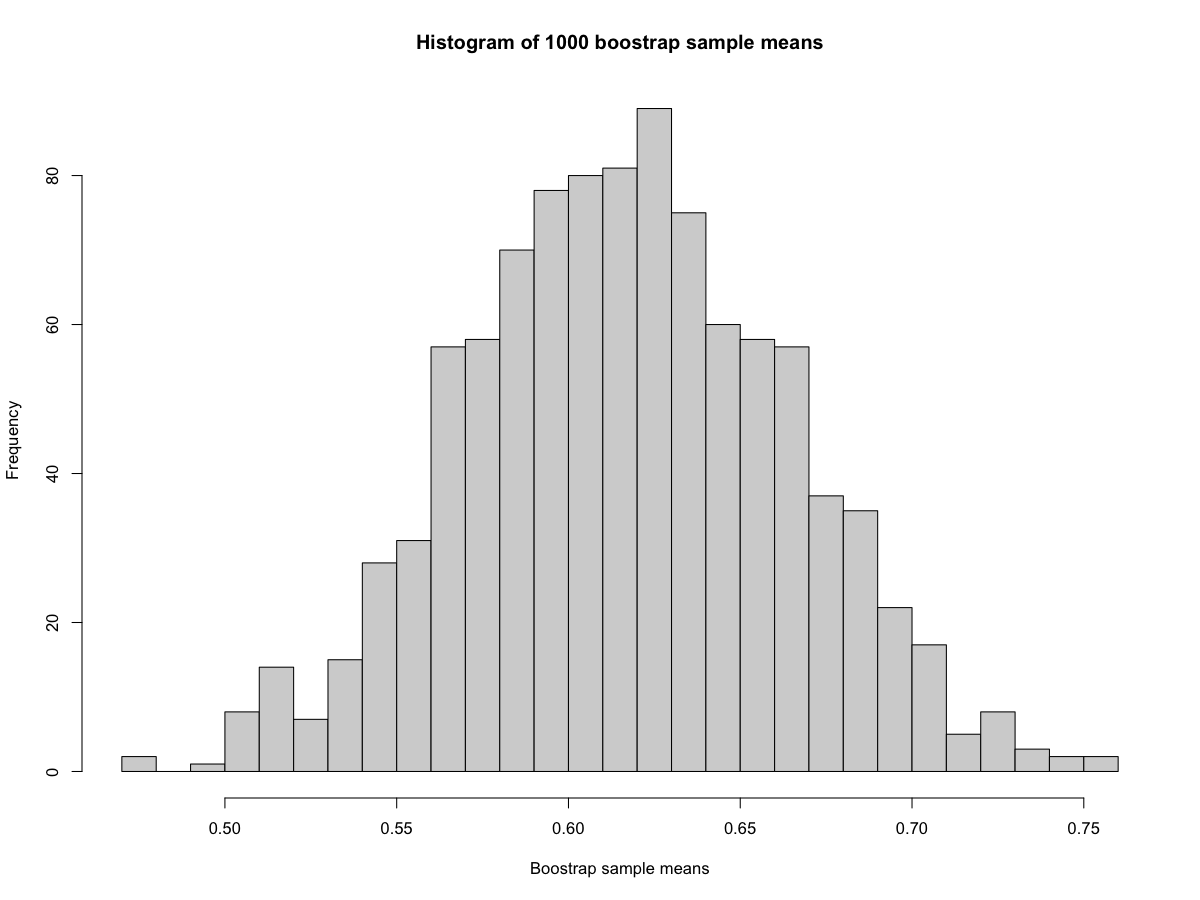

In [5]:
hist(bootstrapXbar, 30, 
    xlab = "Boostrap sample means", 
    ylab = "Frequency", 
    main = "Histogram of 1000 boostrap sample means")

<font size="4"> This "hist" function draws a histogram of the first argument. The next argument "30" determines the number of bars of the histogram. Arguments "xlab" and "ylab" are to write lables on x- and y-axes. Argument "main" is to write the title of the histogram. </font>

## 5. Finally we compute a 95% bootstrap interval for $\theta$.

In [6]:
sort(bootstrapXbar)[25]
sort(bootstrapXbar)[975]

[1] 0.52

[1] 0.71

<font size="4"> This "sort" function sorts the values in "bootstrapXbar" in increasing order. The bracket is used to return the 25th and 975th values from the sorted "bootstrapXbar".</font>

## 6. We compare the interval with an approximate 95% confidence interval.

In [7]:
round(mean(data) - 1.96 * sqrt(mean(data) * (1 - mean(data)) / 100), 3)
round(mean(data) + 1.96 * sqrt(mean(data) * (1 - mean(data)) / 100), 3)

[1] 0.525

[1] 0.715

<font size="4"> These two lines compute the lower and upper bounds of an approximate 95% confidence interval. The function "round" is used to display the numeric result with maximum 3 decimal places.</font>